In [1]:
import os
# disable running on GPU
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

import numpy as np

import h5py
import pandas as pd
import datetime

import matplotlib.pyplot as plt

from random import shuffle
import random
import pickle
import seaborn as sn
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import h5py
from IPython.display import clear_output
from glob import glob
from tqdm import tqdm
import librosa
import json
import shutil
from multiprocessing import Pool

from utils.datautils import *

/home/zdeploy/.virtualenvs/dl-py3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/zdeploy/.virtualenvs/dl-py3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/zdeploy/.virtualenvs/dl-py3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/zdeploy/.virtualenvs/dl-py3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/zdeploy/.virtualenvs/dl-py3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args

In [2]:
base_path = '/home/zdeploy/AILab/duydv2/VoiceEmbeding'
baseset_path = '/data1/ZAVoiceChallenge/checked-zalo-user'

In [3]:
def get_all_fol(p):
    for a,b,c in os.walk(p):
        return b
def get_all_fname(p):
    for a,b,c in os.walk(p):
        return c

all_data = glob(os.path.join(baseset_path, '**/*.amr'), recursive=True)

In [4]:
magic = len(all_data[0].split('/'))
miss = []
for p in all_data:
    if len(p.split('/')) != magic:
        miss.append(p)

In [5]:
user_dic = {}
for p in all_data:
    pp = p.split('/')
    uid = pp[-2]
    if uid in user_dic:
        user_dic[uid].append(p)
    else:
        user_dic[uid] = [p]

user sum: 5081


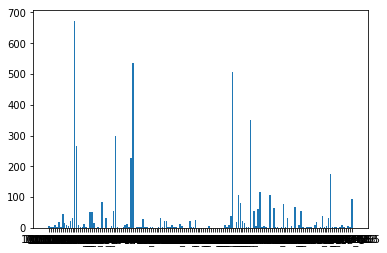

[352, 16, 1, 4, 67, 19, 7, 9, 3, 2, 2, 26, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 24, 3, 4, 537, 10, 2, 3, 2, 2, 2, 6, 508, 1, 3, 3, 9, 22, 3, 1, 106, 1, 55, 7, 1, 1, 2, 2, 3, 1, 12, 4, 3, 53, 107, 1, 1, 1, 84, 44, 1, 3, 1, 9, 17, 2, 52, 1, 118, 4, 60, 2, 9, 54, 9, 1, 1, 1, 3, 1, 1, 7, 31, 2, 1, 1, 9, 1, 1, 1, 12, 1, 4, 4, 40, 31, 5, 4, 32, 7, 1, 1, 31, 1, 6, 8, 1, 20, 3, 18, 8, 5, 299, 5, 4, 16, 12, 1, 2, 66, 3, 2, 1, 1, 22, 2, 1, 56, 94, 5, 79, 24, 1, 3, 3, 227, 174, 81, 1, 3, 3, 2, 39, 30, 266, 1, 2, 9, 673, 21, 3, 3, 3, 3, 32]
((156,), 'min:', 1, 'max:', 673, 'std:', 91.64144959761603, 'mean:', 32.57051282051282, 'median:', 3.0)


In [6]:
xs, ys = convert_dict_to_pair(user_dic)
_ = statistic_data(xs, ys, title='user')

In [7]:
# statistic_lenght = {}
# for x in tqdm(xs):
#     d = librosa.get_duration(filename=x)
#     statistic_lenght[x] = d
# with open('duration_dict.json', 'w') as f:
#     json.dump(statistic_lenght, f)
with open('duration_dict.json', 'r') as f:
    statistic_lenght = json.load(f)

In [8]:
min_thres = 32
max_thres = 36

cutted_dict = {}
for p in user_dic:
    l = len(user_dic[p])
    if l > min_thres:
        if l > max_thres:
            arr = user_dic[p]
            shuffle(arr)
            cutted_dict[p] = arr[:max_thres]
        else:
            cutted_dict[p] = user_dic[p]

user sum: 936


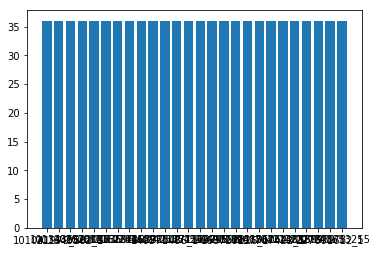

[36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36]
((26,), 'min:', 36, 'max:', 36, 'std:', 0.0, 'mean:', 36.0, 'median:', 36.0)


In [9]:
xs, ys = convert_dict_to_pair(cutted_dict)
_ = statistic_data(xs, ys, title='user')

In [10]:
lenght_dict = {}
for k in cutted_dict:
    arr = cutted_dict[k]
    res = [statistic_lenght[p] for p in arr]
    lenght_dict[k] = res

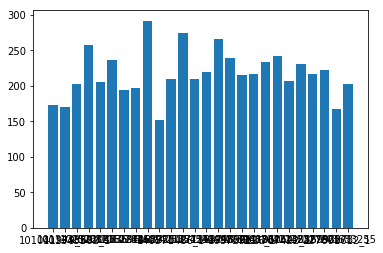

((26,), 'min:', 152.0, 'max:', 291.70000000000005, 'std:', 32.525939580004916, 'mean:', 217.43076923076927, 'median:', 215.55)


In [11]:
keys = list(lenght_dict.keys())
durs = [np.sum(lenght_dict[k]) for k in keys]

plt.bar(keys, durs)
plt.show()

stat(durs)

In [17]:
np.sum(durs)

5653.200000000001

In [13]:
target_path = '/data1/ZAVoiceChallenge/duydv2/user_embeding'
for p, y in tqdm(zip(xs, ys), total=len(xs)):
    fname = p.split('/')[-1].split('.')[0]
    dst = os.path.join(target_path, '{}_{}.amr'.format(ys.index(y), fname))
    shutil.copyfile(p, dst)

100%|██████████| 936/936 [00:00<00:00, 3202.94it/s]


In [14]:
all_data_moved = glob(os.path.join(target_path, '*.amr'))

In [19]:
save_path = '/data1/ZAVoiceChallenge/duydv2/user_embed/user_embeding_cut_3s'

def augmentation(y, sr):
#     res = []
#     for pitch_lv in [-2, 0, 2]:
#         for stretch_lv in [0.8, 1.0, 1.2]:
#             y_p = librosa.effects.pitch_shift(y, sr, n_steps=pitch_lv)
#             y_p_k = librosa.effects.time_stretch(y, stretch_lv)
#             res.append(y_p_k)
#     return res
    return [y]

def load_wave_and_cut(p):
    try:
        p
        pp = p.split('/')
        fname = pp[-1]
        
        y_o, sr = librosa.load(p)
        
        y_augs = augmentation(y_o, sr)
        for i_aug in range(len(y_augs)):
            y = y_augs[i_aug]

            cut_duration = 3.0
            wave_lenght = int(cut_duration*sr)

            if wave_lenght > y.shape[0]:
                numm = int(wave_lenght/y.shape[0])+1
                y = np.tile(y, numm)
                wave_cut_time = 1
                wave_gap = 0
            else:
                wave_cut_time = int(y.shape[0] / wave_lenght)
                wave_gap = int((y.shape[0] - wave_lenght*wave_cut_time)/2)

            yy = y[wave_gap:wave_gap+wave_lenght*wave_cut_time]
            yyy = yy.reshape(wave_cut_time, wave_lenght)
            for i in range(wave_cut_time):
                logmel = librosa.power_to_db(librosa.feature.melspectrogram(y=yyy[i,:], sr=sr), ref=np.max)
                logmel = logmel[:80,:]
                dst = os.path.join(save_path, '{}_{}_{}.npy'.format(fname.split('.')[0], i, i_aug))
                np.save(dst, logmel)
    except Exception as e:
        print(e)
        print(item)
        
def load_wave(p):
    try:
        pp = p.split('/')
        fname = pp[-1]
        
        y, sr = librosa.load(p)
        logmel = librosa.power_to_db(librosa.feature.melspectrogram(y=y, sr=sr), ref=np.max)
        logmel = logmel[:80,:]
        dst = os.path.join('/data1/ZAVoiceChallenge/duydv2/user_embed/user_embeding_spec', '{}.npy'.format(fname.split('.')[0]))
        np.save(dst, logmel)
    except Exception as e:
        print(e)

In [16]:
with Pool(20) as p:
    for _ in tqdm(p.imap_unordered(load_wave_and_cut, all_data_moved), total=len(all_data_moved)): pass

100%|██████████| 936/936 [00:34<00:00, 26.89it/s]


In [20]:
with Pool(20) as p:
    for _ in tqdm(p.imap_unordered(load_wave, all_data_moved), total=len(all_data_moved)): pass

100%|██████████| 936/936 [00:30<00:00, 31.13it/s]


In [21]:
spec = np.load(os.path.join(save_path, '9_892824118512419821_7b8fc704145cfc02a54d_0_0.npy'))

In [22]:
spec.shape

(80, 130)

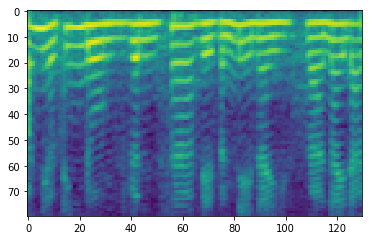

In [23]:
plt.imshow(spec)
plt.show()